In [68]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pickle
import joblib

import warnings
warnings.filterwarnings('ignore')
print("imported")

imported


In [69]:
x,y=[],[]

In [70]:
x=[]
y=[]
with open(r"C:\Users\Hp\OneDrive\Desktop\Data Science\ml\SMSSpamCollection.txt","r") as file:
    data=file.read()
    for data_item in data.split("/n"):
        if len(data_item.split("/t"))==2:
            x.append(data_item.split("/t")[1])
            y.append(data_item.split("/t")[0])
print("successfully read data from text file and split it into x and y")

successfully read data from text file and split it into x and y


In [71]:
len(x),len(y)

(3, 3)

In [72]:
data_dict={'email_message':x,'label':y}
df=pd.DataFrame(data_dict)
df.head()

,email_message,label
0,eam news. Txt ur national team to 87077 eg ENG...,"ham\tGo until jurong point, crazy.. Available ..."
1,one\nham\tNow that you have started dont stop....,atalie2k9 STOP? Send STOP FRND to 62468\nham\t...
2,ms. widelive.com/index. wml?id=820554ad0a17055...,at27081980 STOP? Send STOP FRND to 62468\nham\...


In [73]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Hp\OneDrive\Desktop\Data Science\ml\SMSSpamCollection.txt",
               sep='\t',
               header=None,
               names=['label','message'],
               encoding='utf-8',
               on_bad_lines='skip')
print(df.head())
print(f"\nSuccessfully loaded {len(df)}")

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Successfully loaded 5572


In [74]:
data_dict={"email_message":x,"label":y}
df=pd.DataFrame(data_dict)
df.head()

,email_message,label
0,eam news. Txt ur national team to 87077 eg ENG...,"ham\tGo until jurong point, crazy.. Available ..."
1,one\nham\tNow that you have started dont stop....,atalie2k9 STOP? Send STOP FRND to 62468\nham\t...
2,ms. widelive.com/index. wml?id=820554ad0a17055...,at27081980 STOP? Send STOP FRND to 62468\nham\...


In [75]:
for i in range(0,len(df)):
    message=re.sub('[^a-zA-z]',' ',df["email_message"][i])
    message=message.lower()
    df['email_message'][i]=message
df.head()


,email_message,label
0,eam news txt ur national team to eg eng...,"ham\tGo until jurong point, crazy.. Available ..."
1,one ham now that you have started dont stop j...,atalie2k9 STOP? Send STOP FRND to 62468\nham\t...
2,ms widelive com index wml id ad a ...,at27081980 STOP? Send STOP FRND to 62468\nham\...


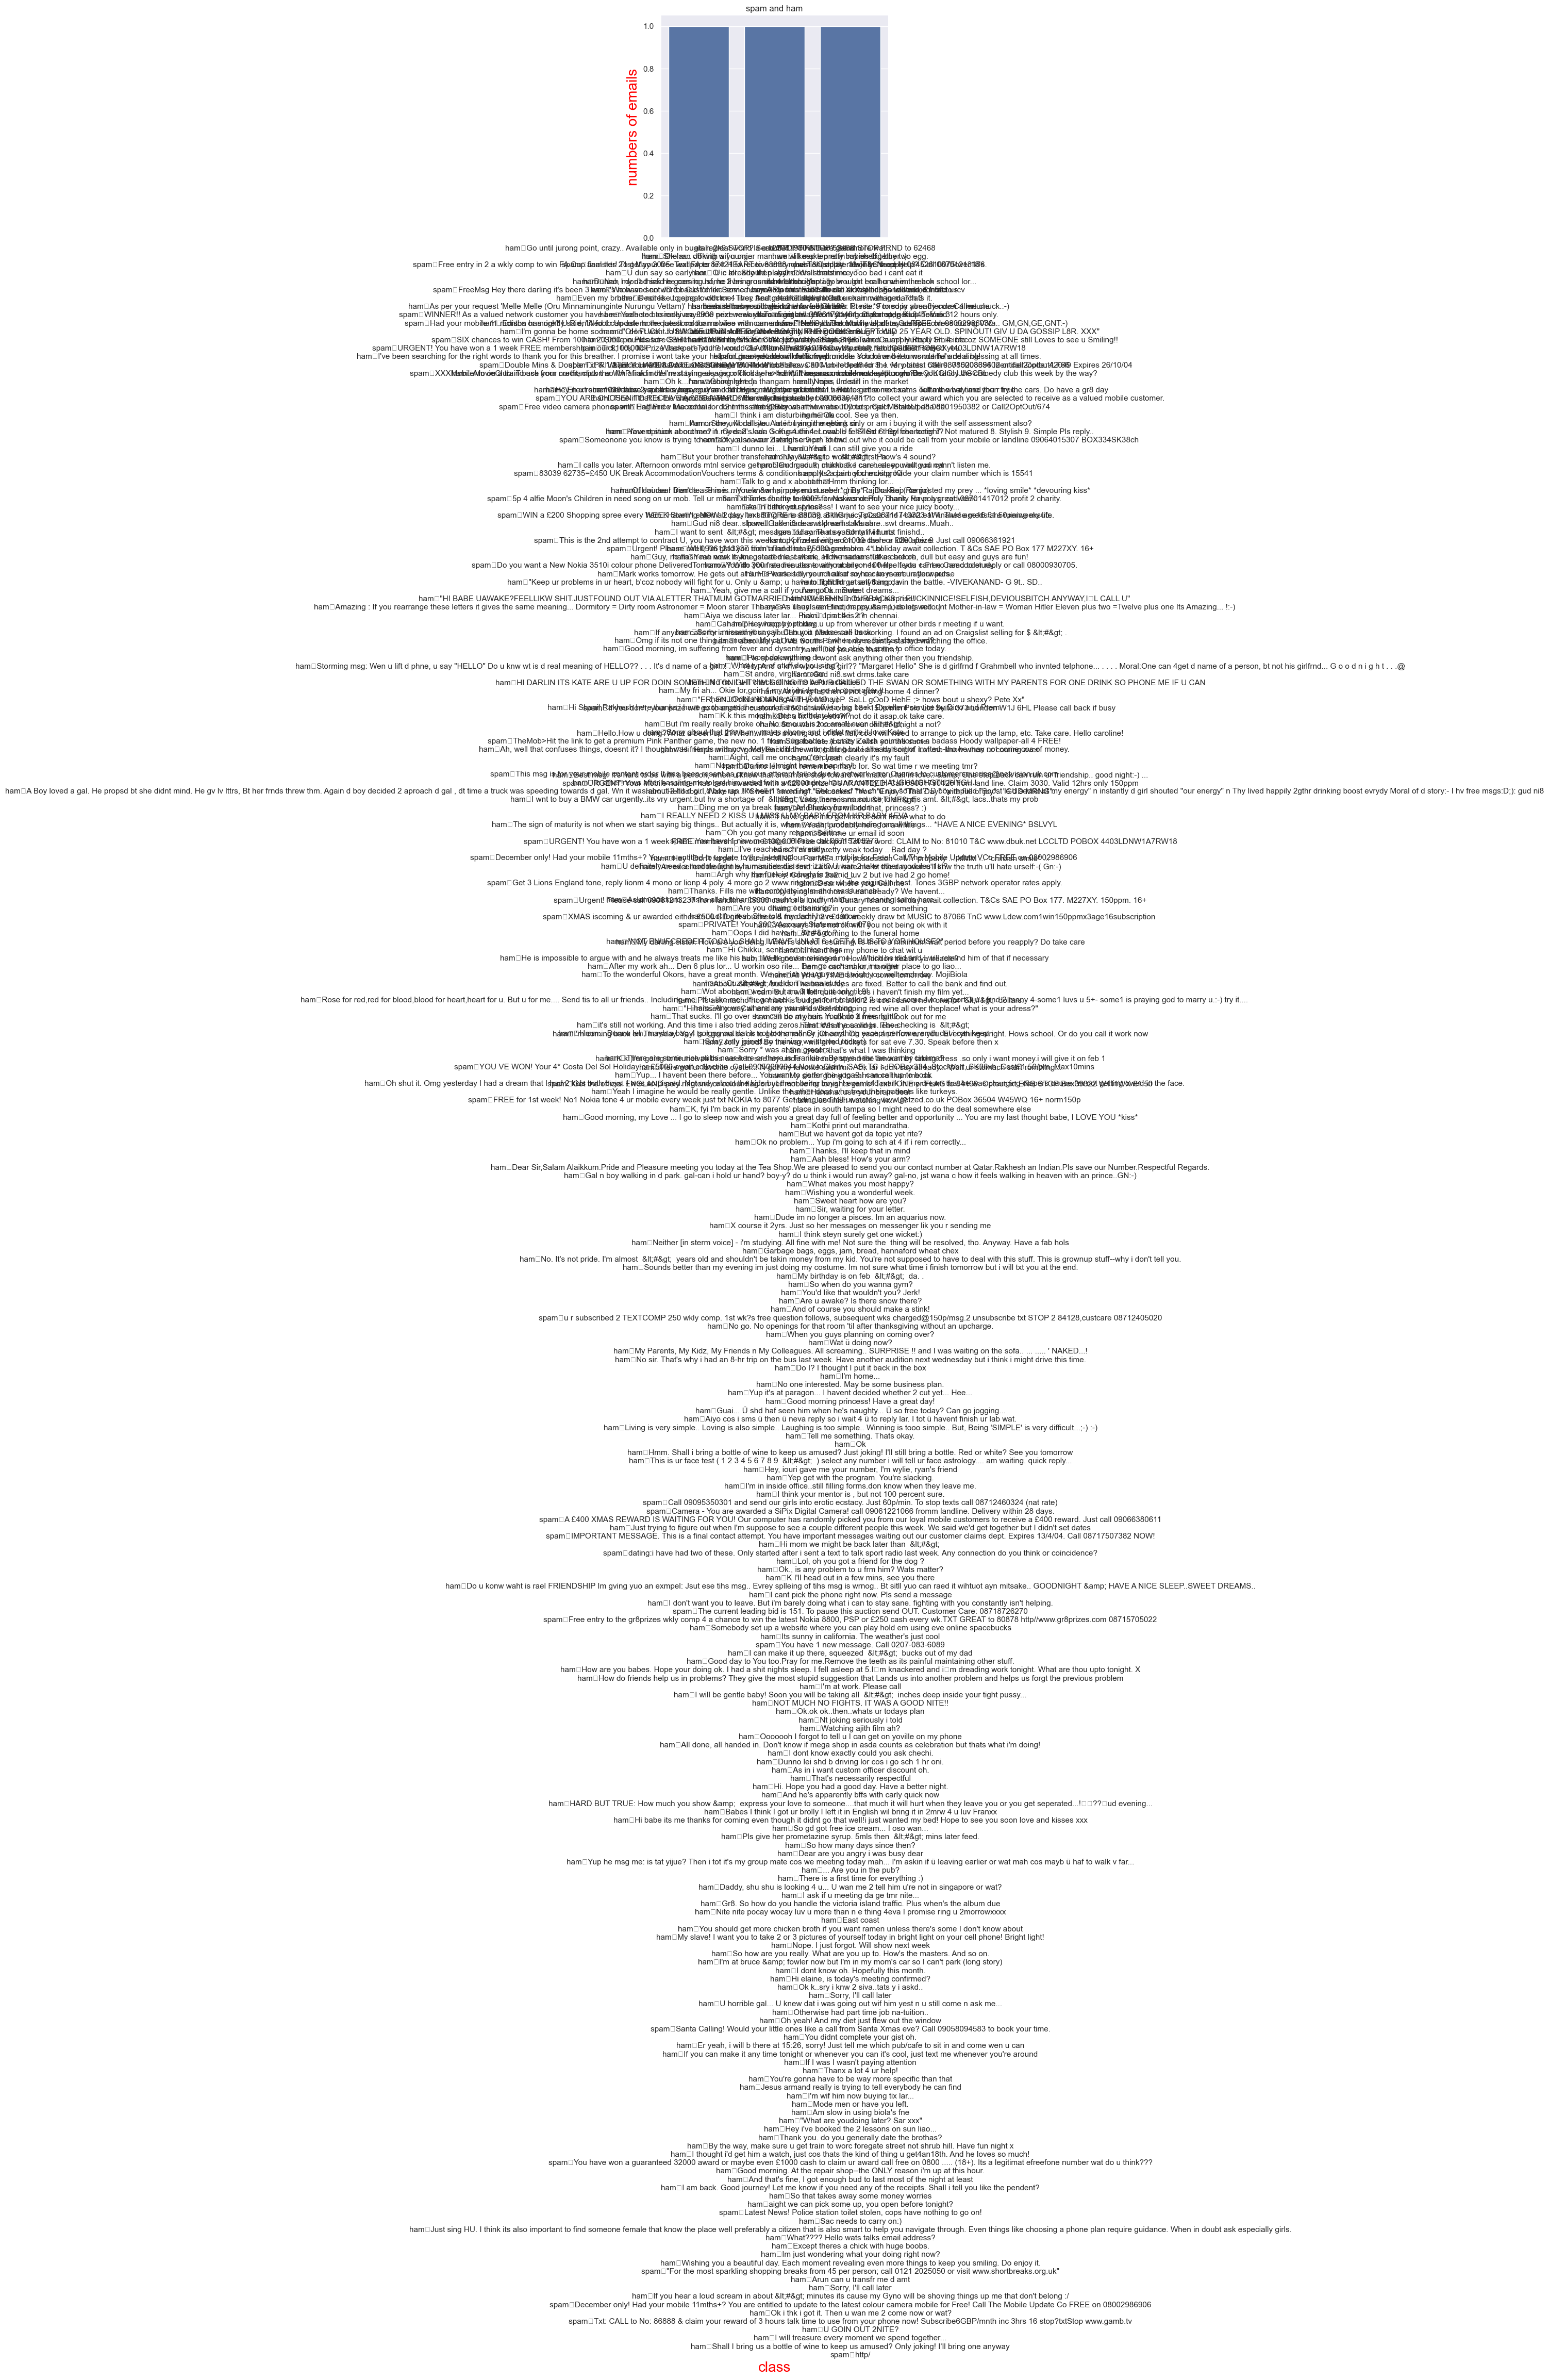

In [78]:
classes=list(df['label'].value_counts().index)
value=list(df['label'].value_counts().values)
sns.set(rc={'figure.figsize': (8, 20)})
sns.catplot(x=classes,y=value,kind='bar')
plt.title('spam and ham')
plt.xlabel('class',fontsize=20,color='red')
plt.ylabel('numbers of emails',fontsize=20,color='red')
plt.show()

In [77]:
df.sample(2000)

ValueError: Cannot take a larger sample than population when 'replace=False'

In [ ]:
ham=df[df['label']=='ham'].sample(1000)
spam=df[df['label']=='spam']
balance_df=pd.concat([ham,spam])

In [ ]:
balance_df['label'].value_counts()

label
ham     1000
spam     747
Name: count, dtype: int64

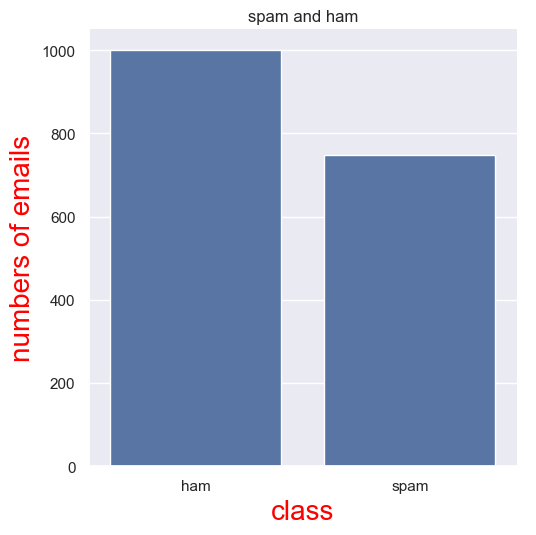

In [ ]:
classes=list(balance_df['label'].value_counts().index)
value=list(balance_df['label'].value_counts().values)
sns.set(rc={'figure.figsize': (8, 20)})
sns.catplot(x=classes,y=value,kind='bar')
plt.title('spam and ham')
plt.xlabel('class',fontsize=20,color='red')
plt.ylabel('numbers of emails',fontsize=20,color='red')
plt.show()

In [ ]:
balance_df['label']=balance_df['label'].map({'ham':0,'spam':1})

In [ ]:
print('Duplicate emails',balance_df.duplicated().sum())

Duplicate emails 115


In [ ]:
print("shape of the data:",balance_df.shape)

shape of the data: (1747, 2)


In [ ]:
balance_df.drop_duplicates(inplace=True)

In [ ]:
print("shape of the data:",balance_df.shape)

shape of the data: (1632, 2)


In [ ]:
balance_df.drop_duplicates(inplace=True)

In [ ]:
print("Duplicate emails:", balance_df.duplicated().sum())

Duplicate emails: 0


In [ ]:
print("shape of the data:",balance_df.shape)

shape of the data: (1632, 2)


In [ ]:
x=(variable)balance_df[]

SyntaxError: invalid syntax (747471405.py, line 1)

In [ ]:
x[0:5]

['eam news. Txt ur national team to 87077 eg ENGLAND to 87077 Try:WALES, SCOTLAND 4txt/ú1.20 POBOXox36504W45WQ 16+\nham\tIs that seriously how you spell his name?\nham\tI‘m going to try for 2 months ha ha only joking\nham\tSo ü pay first lar... Then when is da stock comin...\nham\tAft i finish my lunch then i go str down lor. Ard 3 smth lor. U finish ur lunch already?\nham\tFfffffffff. Alright no way I can meet up with you sooner?\nham\tJust forced myself to eat a slice. I\'m really not hungry tho. This sucks. Mark is getting worried. He knows I\'m sick when I turn down pizza. Lol\nham\tLol your always so convincing.\nham\tDid you catch the bus ? Are you frying an egg ? Did you make a tea? Are you eating your mom\'s left over dinner ? Do you feel my Love ?\nham\tI\'m back &amp; we\'re packing the car now, I\'ll let you know if there\'s room\nham\tAhhh. Work. I vaguely remember that! What does it feel like? Lol\nham\tWait that\'s still not all that clear, were you not sure about me bein

In [ ]:
balance_df.drop_duplicates(inplace=True)

In [ ]:
bow_obj=CountVectorizer(max_features=2000, stop_words='english')

In [ ]:
x_transform=bow_obj.fit_transform(x)

In [ ]:
dense_matrix=x_transform.toarray()

In [ ]:
dense_matrix.shape

(3, 2000)

In [ ]:
x=dense_matrix

In [ ]:
x[0:5]

array([[1, 6, 2, ..., 2, 9, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]], dtype=int64)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
import numpy as np
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(x_train)
y_test=np.array(y_test)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2, 2000), (1, 2000), (2, 2000), (1,))

In [ ]:
MultinomialNB().fit(x_train,y_train).score(x_test,y_test)

ValueError: y should be a 1d array, got an array of shape (2, 2000) instead.